In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd '/content/drive/Shareddrives/SWC_Capstone'

/content/drive/Shareddrives/SWC_Capstone/5월


## 데이터


In [2]:
# 필요한 라이브러리 호출
import time
import csv
import sys
import re, numpy as np, pandas as pd
from pprint import pprint


import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [3]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import numpy as np
import pandas as pd

In [4]:
!pip install -q wordcloud

In [11]:
names = ['depression', 'bipolar', 'panic', 'covid19', 'relationship', 'teaching',\
        'healthanxiety', 'lonely', 'socialanxiety', 'SuicideWatch', 'mentalhealth', 'conspiracy', 'divorce', 'fitness',\
        'guns', 'jokes', 'legaladvice', 'meditation', 'personalfinance']

MENTAL = "depression / bipolar / panic / healthanxiety / lonely / socialanxiety / SuicideWatch / mentalhealth"
MENTAL = MENTAL.split(" / ")
NONMENTAL = "relationship / teaching / conspiracy / divorce / fitness / guns / jokes / legaladvice / meditation / personalfinance"
NONMENTAL = NONMENTAL.split(" / ")
ENVIRONMENT = ["covid19"]

# 문장이 있는 데이터셋 불러오기
subreddits = []
for i in range(len(names)):
  temp = pd.read_csv("./sample_ym/"+names[i]+"_sample_ym.csv")
  subreddits.append(temp)

In [12]:
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))
stop_words.extend(["'m"])
print()
temp = ['hadn','mightn','mustn','wasn','couldn','doesn','hasn','ain','shan','aren','weren','wouldn','shouldn']
new_temp = []
for t in temp:
  new_temp.append(t+'t')
new_stopwords = ["i'm","i've","ive"] + new_temp

for word in stop_words:
    if 'not' in word: continue
    elif "'t" in word: continue
    elif len(word) == 1: continue
    elif word in temp: continue
    elif '!' in word: continue
    elif '.' in word: continue
    else: new_stopwords.append(word)
        
# 감정분석용 cleansing
def s_cleansing(List):
    count=0
    corpus = []
    for i in List:
        i = str(i)# 정규화 에러로 인해 추가
        url_pattern ='https?://\S+|#([0-9a-zA-Z]*)'
        i = re.sub(pattern=url_pattern, repl=' ', string = i)
        i = i.replace('\r','').replace('\n','')
        text = re.sub('[-=+,#/\?:^$”@*\"“※~&%ㆍ!』\\‘|\(\)\[\]\<\>`…》;’]', '', i.lower())
        corpus.append(text)
        count+=1
        #if(count>24900): print(count)        
    return corpus



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
tot_mix = []

for i in range(len(names)):
  temp_mix = []
  temp = subreddits[i]

  for text in (temp['title'] + ' ' + temp['text_context']):
    temp_mix.append(text)

  tot_mix.append(temp_mix)


print(len(tot_mix))

19


In [14]:
## 불용어 정의 
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

STOP_WORDS = set()

file = open("./stopwords.txt", "r")
while True:
    line = file.readline()
    if not line:
        break
    STOP_WORDS.add(line.strip())

file.close()
len(STOP_WORDS)

for word in new_stopwords:
    if word not in STOP_WORDS:
        STOP_WORDS.add(word)
print(STOP_WORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'think', 'various', 'v', 'refs', 'beginnings', 'zero', 'primarily', 'many', 'section', 'aint', 'down', 'whither', 'wherein', 'causes', 'perhaps', 'begin', 'anyone', 'us', 'four', "that've", 'h', 'adj', 'ever', 'done', 'need', 'too', 'what', '(', 'nor', 'her', 'came', 'necessarily', 'between', 'nowhere', 'to', 'former', 'although', 'seven', 'each', 'u', 'yours', 'co', 'et-al', 'else', 'yourself', 'six', 'which', 'que', "'", 'out', 'an', 'ex', 'mainly', 'o', 'haven', 'normally', 'she', 'affects', 'similarly', 'try', 'further', 'anyways', 'off', 'afterwards', '|', 'million', 'myself', 'needn', 'g', 'aren', 'ah', 'line', 'ran', 'shows', 'pages', 'heres', 'says', 'strongly', 'eight', "there'll", 'ff', 'herein', 'show', 'therefore', 'put', 'research', 'since', 'everything', 'whence', 'gave', 'whereas', 'proud', "can't", 'downwards', 'tends', "they'll", 'while', 'regards', 'everyone', 'km', 'hundred', 'besides', 'mean', 'really', 'thousand', 'like', 'omitted', 'showed', 'howbeit', 'whole', '

In [15]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
def tokenize_sentence(text_data):
  result_data = []
  for sentence in (text_data):
    tokenized = text_to_word_sequence(sentence)
        
    token_without_stop = []
    for token in tokenized:
      if token not in STOP_WORDS:
        token_without_stop.append(token)

    result_data.append(token_without_stop)
  return result_data

In [17]:
tot_tokens = []
for i in range(len(tot_mix)):
    temp = s_cleansing(tot_mix[i])
    temp = tokenize_sentence(temp)
    tot_tokens.append(temp)

# LDA 성능 실험


- Perplexity: 헷갈리는 정도<br>
낮을수록 언어의 모델의 성능이 좋다.<br>
참고 : https://settlelib.tistory.com/55
- Cohenrence: 유사도<br>
높을수록 언어 모델의 성능이 좋다.

In [22]:
from gensim import corpora
import gensim.corpora.csvcorpus
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [20]:
all_reddit_text_in_one = []
for i in range(len(tot_tokens)):
    all_reddit_text_in_one += tot_tokens[i]
len(all_reddit_text_in_one)

54760

In [21]:
dictionary = corpora.Dictionary(all_reddit_text_in_one)
corpus = [dictionary.doc2bow(text) for text in all_reddit_text_in_one]


In [24]:
coherences=[]
perplexities=[]
passes=[]

for i in range(10):    
    ntopics= 10
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=ntopics, 
                                           passes = p,
                                           iterations = 100)
    print("i: ", i)
     
    print('epoch',p,time.time() - tic)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

i:  0
epoch 1 86.21600103378296
Cpherence -3.1337237758892225
Perplexity:  -8.746572647620969 


i:  1
epoch 5 181.82905340194702
Cpherence -3.42364008022001
Perplexity:  -8.575182807952347 


i:  2
epoch 10 327.6155412197113
Cpherence -3.071726184365674
Perplexity:  -8.541105736863749 


i:  3
epoch 15 458.3445680141449
Cpherence -4.065950753755855
Perplexity:  -8.528421300083929 


i:  4
epoch 20 601.5086426734924
Cpherence -3.955150786988642
Perplexity:  -8.508231618490457 


i:  5
epoch 25 738.349889755249
Cpherence -4.0053227968552445
Perplexity:  -8.497280666875142 


i:  6
epoch 30 913.5535130500793
Cpherence -3.4718280065070877
Perplexity:  -8.491661124132436 


i:  7
epoch 35 1080.0042026042938
Cpherence -3.852980626363938
Perplexity:  -8.480152650718262 


i:  8
epoch 40 1165.085198879242
Cpherence -3.9867702840094488
Perplexity:  -8.479332778494564 


i:  9
epoch 45 1369.7094359397888
Cpherence -2.9594886098040734
Perplexity:  -8.46444363092055 




Text(0.5, 0, 'passes')

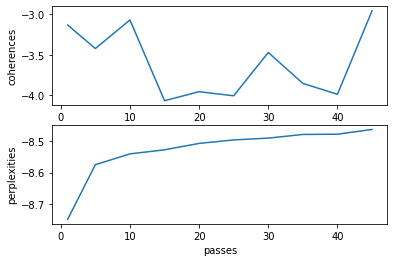

In [25]:
passes = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
coherences
perplexities

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(passes, coherences)
ax1.set_ylabel("coherences")
ax2.plot(passes, perplexities)
ax2.set_ylabel("perplexities")
ax2.set_xlabel("passes")

In [27]:
coherencesT=[]
perplexitiesT=[]
topic_n=[]
warnings.filterwarnings('ignore')

for i in range(2,20):
    topic_n.append(i)
    nwords = 100
    tic = time.time()
    lda4 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=i, 
                                           passes = 20,
                                           iterations = 100)
    print('ntopics',i,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 431.9894187450409
Cpherence -1.6935040898176554
Perplexity:  -8.522960555380177 


ntopics 3 519.2878811359406
Cpherence -1.846260226272966
Perplexity:  -8.478016882579665 


ntopics 4 540.9688549041748
Cpherence -1.9806615686039033
Perplexity:  -8.470751490537094 


ntopics 5 550.8608577251434
Cpherence -2.08066794400366
Perplexity:  -8.44213377781425 


ntopics 6 555.6815178394318
Cpherence -2.6258299448722995
Perplexity:  -8.45530430336427 


ntopics 7 596.5765979290009
Cpherence -3.525231463838011
Perplexity:  -8.502118951536 


ntopics 8 546.6448564529419
Cpherence -3.4380126132655278
Perplexity:  -8.493862662344727 


ntopics 9 592.2254009246826
Cpherence -3.575435203333127
Perplexity:  -8.4954047013424 


ntopics 10 636.2595827579498
Cpherence -3.3932476704741354
Perplexity:  -8.521030129673811 


ntopics 11 676.8496496677399
Cpherence -3.7164970567484445
Perplexity:  -8.532003429304815 


ntopics 12 660.5343039035797
Cpherence -4.61896209811787
Perplexity:  -8.5282304

Text(0.5, 0, 'n_topic')

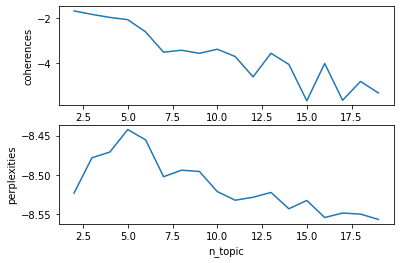

In [28]:

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(topic_n, coherencesT)
ax1.set_ylabel("coherences")
ax2.plot(topic_n, perplexitiesT)
ax2.set_ylabel("perplexities")
ax2.set_xlabel("n_topic")

# LDA 토픽 분석 - 최종결과 선택 모델



In [ ]:
from gensim import corpora
import gensim.corpora.csvcorpus

In [ ]:
all_reddit_text_in_one = []
for i in range(len(tot_tokens)):
    all_reddit_text_in_one += tot_tokens[i]
len(all_reddit_text_in_one)

In [ ]:
dictionary = corpora.Dictionary(all_reddit_text_in_one)
corpus = [dictionary.doc2bow(text) for text in all_reddit_text_in_one]


In [ ]:
gensim.corpora.csvcorpus.CsvCorpus.save_corpus('./psy_data/year_month_col/corpus.txt',corpus,id2word=dictionary)

In [ ]:
import gensim

NUM_TOPICS = 10 
ldamodel = gensim.models.ldamodel.LdaModel(corpus2, num_topics = NUM_TOPICS, id2word=dictionary2, passes=500)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

(0, '0.020*"covid" + 0.013*"people" + 0.009*"going" + 0.008*"test"')
(1, '0.085*"amp" + 0.006*"questions" + 0.005*"\xa0" + 0.004*"post"')
(2, '0.026*"school" + 0.014*"teaching" + 0.014*"teacher" + 0.013*"students"')
(3, '0.062*"panic" + 0.029*"attacks" + 0.023*"attack" + 0.021*"anxiety"')
(4, '0.013*"time" + 0.012*"feel" + 0.009*"things" + 0.009*"friends"')
(5, '0.006*"women" + 0.005*"fwb" + 0.004*"tech" + 0.004*"initiate"')
(6, '0.020*"feel" + 0.020*"depression" + 0.017*"bipolar" + 0.013*"diagnosed"')
(7, '0.010*"wife" + 0.006*"booster" + 0.003*"ring" + 0.003*"technology"')
(8, '0.009*"engineering" + 0.007*"white" + 0.006*"black" + 0.003*"colleges"')
(9, '0.008*"weight" + 0.007*"hair" + 0.006*"eating" + 0.005*"loss"')


In [ ]:
print(ldamodel.print_topics())


[(0, '0.020*"covid" + 0.013*"people" + 0.009*"going" + 0.008*"test" + 0.008*"vaccinated" + 0.008*"mask" + 0.008*"vaccine" + 0.007*"pandemic" + 0.007*"virus" + 0.006*"positive"'), (1, '0.085*"amp" + 0.006*"questions" + 0.005*"\xa0" + 0.004*"post" + 0.004*"thread" + 0.003*"link" + 0.003*"survey" + 0.003*"guide" + 0.003*"27f" + 0.003*"gt"'), (2, '0.026*"school" + 0.014*"teaching" + 0.014*"teacher" + 0.013*"students" + 0.012*"year" + 0.009*"job" + 0.009*"class" + 0.009*"work" + 0.008*"teachers" + 0.007*"student"'), (3, '0.062*"panic" + 0.029*"attacks" + 0.023*"attack" + 0.021*"anxiety" + 0.012*"feel" + 0.012*"heart" + 0.010*"disorder" + 0.009*"felt" + 0.009*"feeling" + 0.008*"started"'), (4, '0.013*"time" + 0.012*"feel" + 0.009*"things" + 0.009*"friends" + 0.008*"told" + 0.007*"relationship" + 0.007*"going" + 0.007*"dont" + 0.006*"years" + 0.006*"people"'), (5, '0.006*"women" + 0.005*"fwb" + 0.004*"tech" + 0.004*"initiate" + 0.003*"attraction" + 0.003*"conflicted" + 0.003*"lesbian" + 0.002

In [ ]:
!pip install pyLDAvis

import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus2, dictionary2)
pyLDAvis.display(vis)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus2)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable.to_csv('./psy_data/year_month_col/topictable500.csv', mode='w', index = False)